In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import logsumexp

In [2]:
n = 10
m = 5

np.random.seed(0)

mask = np.zeros(n, dtype=bool)
mask[np.random.permutation(n)[:m]] = 1

In [3]:
def f(x):
    return -logsumexp(x[..., mask], axis=-1) + logsumexp(x, axis=-1)

In [4]:
directions = np.random.randn(10, n)
directions /= np.linalg.norm(directions, axis=-1, keepdims=True)

In [5]:
r = 5
t = np.linspace(-r, r, 50)

In [6]:
rays = directions[..., None, :] * t[:, None]
curves = f(rays)

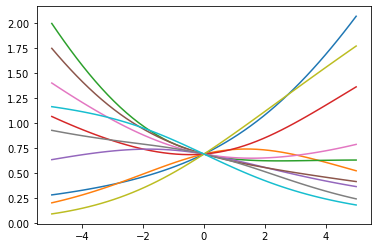

In [7]:
plt.plot(t, curves.T);

In [8]:
h = np.diff(np.diff(curves, axis=-1), axis=-1)
np.mean(h >= 0, axis=-1)

array([1.        , 0.3125    , 0.85416667, 0.97916667, 0.3125    ,
       1.        , 1.        , 0.54166667, 0.75      , 0.5       ])